In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use("Qt5Agg")

In [2]:
path_to_com_npy = r"C:\Users\WindowsPC_Hallway\FreeMocap_Data\recording_sessions\session_2023-03-15_17_11_53\recording_17_38_08_gmt-4___ss_jumping_0\output_data\center_of_mass\total_body_center_of_mass_xyz.npy"

In [3]:
com_frame_xyz = np.load(path_to_com_npy)
com_frame_xyz.shape

(2093, 3)

In [4]:
%notebook

UsageError: the following arguments are required: filename


In [5]:
print(com_frame_xyz[120,:])

[ -75.30634757   40.76765002 1965.76155539]


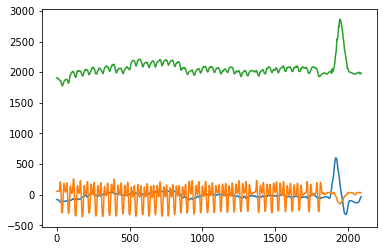

In [6]:
plt.plot(com_frame_xyz)
plt.show()



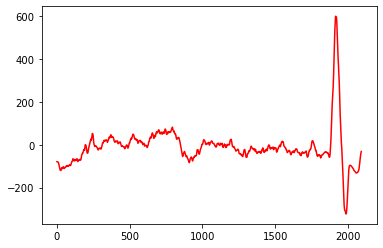

In [7]:
plt.plot(com_frame_xyz[:,0], 'r')

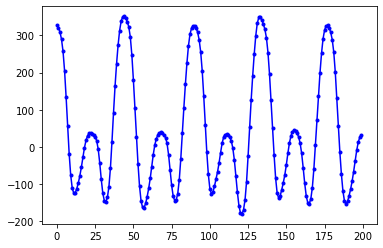

In [8]:
plt.plot(-com_frame_xyz[500:700,1], 'b.-')



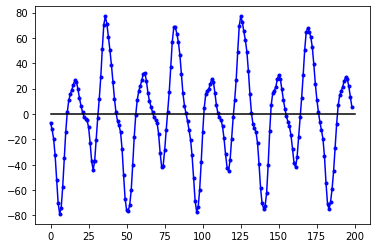

In [9]:
plt.plot(np.diff(-com_frame_xyz[500:700,1]), 'b.-')
plt.plot([0, 200],[0,0], 'k-')


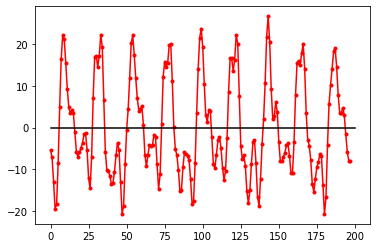

In [10]:
plt.plot(np.diff(np.diff(-com_frame_xyz[500:700,1])), 'r.-')
plt.plot([0, 200],[0,0], 'k-')

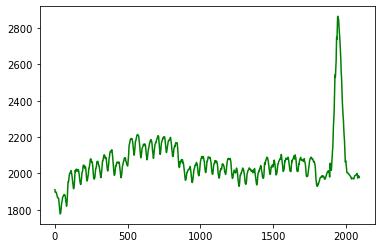

In [11]:
plt.plot(com_frame_xyz[:,2], 'g')


In [12]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [13]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1, subplot_titles=('total body center of mass trajectory'))

fig.add_trace(
    go.Scatter(y = com_frame_xyz[:,2]),
    row=1, col=1
)


#COM plot axes labels 
fig['layout']['yaxis']['title']='Y Axis (mm)'

fig.update_layout(height=600, width=800,showlegend=False)
fig.show()


In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1, subplot_titles=('Total Body Center of Mass Trajectory'))

# Add X data trace
fig.add_trace(
    go.Scatter(x=com_frame_xyz[:, 0], y=com_frame_xyz[:, 1], mode='lines', name='X-Y'),
    row=1, col=1
)

# Add Z data trace
fig.add_trace(
    go.Scatter(x=com_frame_xyz[:, 0], y=com_frame_xyz[:, 2], mode='lines', name='X-Z'),
    row=1, col=1
)

# COM plot axes labels
fig.update_xaxes(title_text='X Axis (mm)', row=1, col=1)
fig.update_yaxes(title_text='Y-Z Axis (mm)', row=1, col=1)

fig.update_layout(height=600, width=800, showlegend=True)
fig.show()


In [15]:
import plotly.graph_objects as go

# Create a 3D scatter plot with animation frames
def create_3d_animation(com_data, frame_step=1):
    # Initialize the 3D scatter plot
    fig = go.Figure(
        data=[go.Scatter3d(x=[com_data[0, 0]], y=[com_data[0, 1]], z=[com_data[0, 2]],
                           mode='markers',
                           marker=dict(size=6))],
        layout=go.Layout(updatemenus=[dict(type='buttons', showactive=False,
                                           buttons=[dict(label='Play',
                                                         method='animate',
                                                         args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}])])]),
        frames=[go.Frame(data=[go.Scatter3d(x=com_data[:i:frame_step, 0], y=com_data[:i:frame_step, 1], z=com_data[:i:frame_step, 2],
                                            mode='markers',
                                            marker=dict(size=6))]) for i in range(1, len(com_data), frame_step)]
    )

    # Set axis labels
    fig.update_layout(scene=dict(xaxis_title='X Axis (mm)', yaxis_title='Y Axis (mm)', zaxis_title='Z Axis (mm)'))

    # Display the animation
    fig.show()

# Create the animation using the com_frame_xyz data
create_3d_animation(com_frame_xyz)